<a href="https://colab.research.google.com/github/MeghasenaServepalli/PythonLibrararies/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('SOCR-HeightWeight.csv')

In [5]:
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [6]:
df=df.drop(labels='Index',axis=1)

In [7]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [8]:
##chech for Missing values
df.isnull()

,Height(Inches),Weight(Pounds)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24995,False,False
24996,False,False
24997,False,False
24998,False,False


<Axes: >

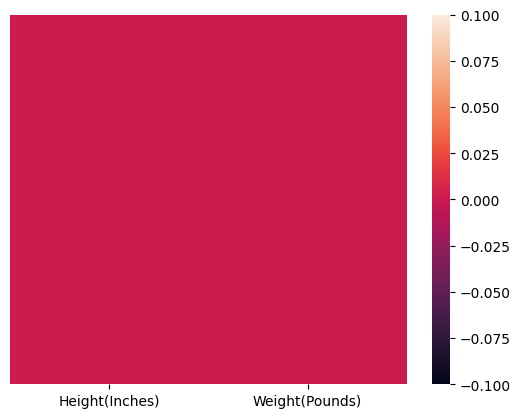

In [9]:
sns.heatmap(df.isnull(),yticklabels=False)

Text(0, 0.5, 'Height')

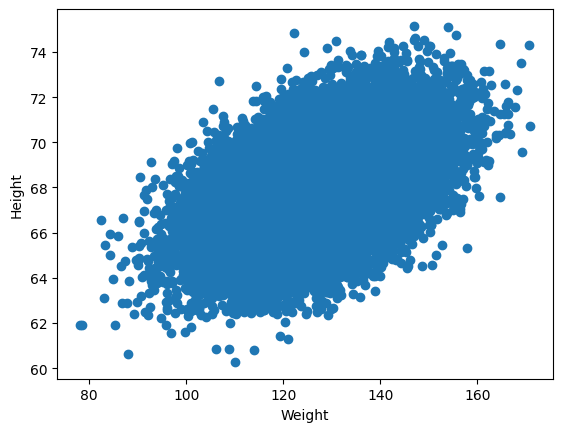

In [10]:
## Scatterplots
plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel("Weight")
plt.ylabel("Height")

<Axes: xlabel='Weight(Pounds)', ylabel='Height(Inches)'>

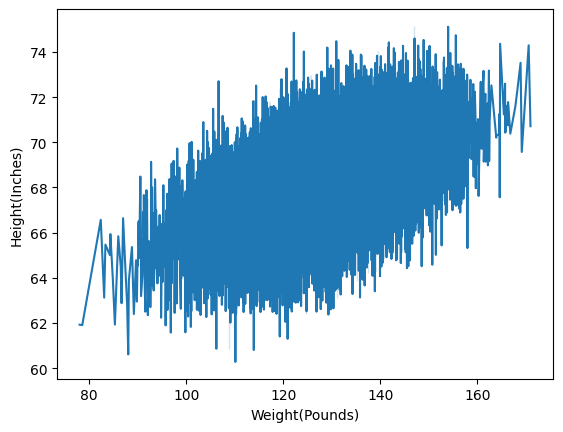

In [11]:
sns.lineplot(df,x=df['Weight(Pounds)'],y=df['Height(Inches)'])

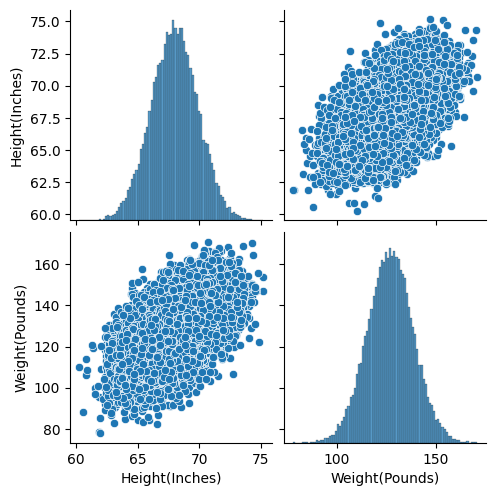

In [13]:
sns.pairplot(df)

In [14]:
##find the correlation just like a heatmap
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


In [18]:
## lets get the independent and dependent features
X=df[['Weight(Pounds)']]
X.dtypes

,0
Weight(Pounds),float64


In [19]:
X.head()

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971


In [22]:
type(X)# Independent Features have to be always Dataframe

pandas.core.frame.DataFrame

In [26]:
y=df['Height(Inches)']

In [27]:
y.head()

,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781


In [28]:
type(y) ##Dependent Features always have to be Series

pandas.core.series.Series

In [31]:
array_X=np.array(X)

In [32]:
array_X

array([[112.9925],
       [136.4873],
       [153.0269],
       ...,
       [118.2655],
       [132.2682],
       [124.8742]])

In [33]:
array_X.shape

(25000, 1)

In [34]:
array_y=np.array(y)

In [35]:
array_y.shape

(25000,)

In [37]:
## Now lets make the Train, Test, Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [38]:
X_train

,Weight(Pounds)
6920,128.0357
17926,115.5202
1123,132.8885
4518,120.5416
5576,122.7718
...,...
21575,111.5242
5390,123.4431
860,120.9809
15795,135.6468


In [39]:
X_test

,Weight(Pounds)
6868,134.2855
24016,111.9666
9668,135.9871
13640,126.3802
14018,100.1810
...,...
24717,105.0288
2578,148.1527
10121,135.6679
21601,113.4876


In [41]:
y_train

,Height(Inches)
6920,69.97280
17926,65.59616
1123,65.24285
4518,67.80062
5576,70.50871
...,...
21575,67.48875
5390,66.92527
860,68.39347
15795,69.29711


In [42]:
X_train.shape

(18750, 1)

In [44]:
y_test.shape

(6250,)

In [45]:
##Perform Standardization
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [47]:
X_train # we can see that all th evalues are set to in between - 1 and 1

array([[ 0.08310666],
       [-0.99311816],
       [ 0.50040551],
       ...,
       [-0.52354516],
       [ 0.73759547],
       [-0.36861454]])

In [51]:
X_test=scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
X_test

array([[-10.76145777],
       [-10.92298186],
       [-10.74914313],
       ...,
       [-10.75145321],
       [-10.91197423],
       [-10.81347515]])

In [55]:
##Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression


In [56]:
##initialize the model
regression=LinearRegression()

In [57]:
## fit the Regression Model
regression.fit(X_train,y_train)

LinearRegression()

In [59]:
## from y=b0+b1x
## here b0 is the intercept when x=0 and b1 is coefficient of x
# so here x is weight and b1 is coeff and now b0 is slope which means
# that with 1 unit moment in weight is causing b0 unit moment in height which is slope
b1=regression.coef_
b1

array([0.94883892])

In [61]:
b0=regression.intercept_
b0

67.9938252704

In [62]:
regression.fit_intercept

True

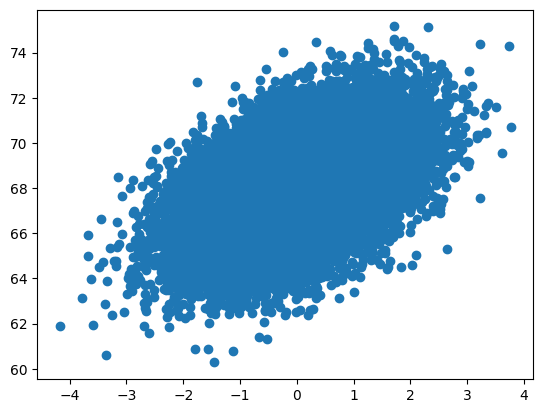

In [63]:
##plot training Data, plot the best line too
plt.scatter(X_train,y_train)

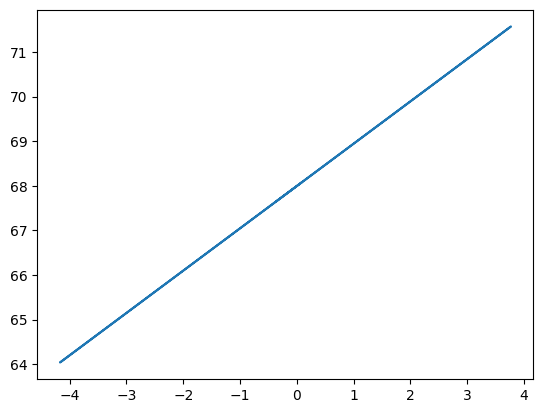

In [65]:
plt.plot(X_train,regression.predict(X_train))

In [67]:
#Predict the data
y_pred=regression.predict(X_test)

In [68]:
y_pred

array([57.78293528, 57.62967494, 57.7946199 , ..., 57.792428  ,
       57.6401194 , 57.73357917])

In [76]:
##performance metrix
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [94]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

mae

10.257316690409985

In [73]:
mse

108.75121270199882

In [80]:
rmse=np.sqrt(mse)

In [81]:
rmse

10.428384951755417

In [86]:
## R square =1-SSR/SST
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [87]:
score

-28.47115727416801

In [90]:
## Adjusted R square=1-(1-Rsqure*(n-1)/(n-k-1))
adjusted_R2=1-((1-score*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))

In [91]:
adjusted_R2

-27.47587416873814

In [96]:
## OLS Linear Regression
##Ordinary Least Square
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()## gets model

In [97]:
model

In [98]:
predict=model.predict(X_test)

In [99]:
predict

array([-10.21088999, -10.36415033, -10.19920538, ..., -10.20139727,
       -10.35370587, -10.2602461 ])

In [101]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Height(Inches)   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.649
Date:                Fri, 08 Nov 2024   Prob (F-statistic):                      0.0561
Time:                        00:43:29   Log-Likelihood:                     -1.0572e+05
No. Observations:               18750   AIC:                                  2.115e+05
Df Residuals:                   18749   BIC:                                  2.115e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [104]:
## predict for new data
regression.predict(scaler.transform([[112]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([66.77416847])

In [ ]:
## gradient descent curve -costfunction(U)
